In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

data = pd.read_csv("tmp.cfg.out")
print(data)

     Tech node (nm)   Capacity (bytes)   Number of banks   Associativity  \
0                40               2048                 1               1   
1                40               2560                 1               1   
2                40               3072                 1               1   
3                40               3584                 1               1   
4                40               4096                 1               1   
..              ...                ...               ...             ...   
315              40          234881024                 1              16   
316              40          268435456                 1              16   
317              40          335544320                 1              16   
318              40          402653184                 1              16   
319              40          469762048                 1              16   

      Output width (bits)   Access time (ns)   Random cycle time (ns)  \
0             

In [2]:
print(data.columns)

Index(['Tech node (nm)', ' Capacity (bytes)', ' Number of banks',
       ' Associativity', ' Output width (bits)', ' Access time (ns)',
       ' Random cycle time (ns)', ' Dynamic search energy (nJ)',
       ' Dynamic read energy (nJ)', ' Dynamic write energy (nJ)',
       ' Standby leakage per bank(mW)', ' Area (mm2)', ' Ndwl', ' Ndbl',
       ' Nspd', ' Ndcm', ' Ndsam_level_1', ' Ndsam_level_2',
       ' Data arrary area efficiency %', ' Ntwl', ' Ntbl', ' Ntspd', ' Ntcm',
       ' Ntsam_level_1', ' Ntsam_level_2', ' Tag arrary area efficiency %',
       ' '],
      dtype='object')


In [3]:
X = data[[' Capacity (bytes)', ' Associativity', 'Tech node (nm)']]  # Features
y = data[' Random cycle time (ns)']  # Target variable

In [4]:
y

0       0.314693
1       0.317513
2       0.320243
3       0.314502
4       0.316659
         ...    
315     8.839630
316     9.023660
317     9.405440
318     9.815200
319    10.253100
Name:  Random cycle time (ns), Length: 320, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,Capacity (bytes),Associativity,Tech node (nm)
132,134217728,2,40
317,335544320,16,40
234,3145728,8,40
312,134217728,16,40
232,2097152,8,40
...,...,...,...
188,33554432,4,40
71,469762048,1,40
106,1572864,2,40
270,98304,16,40


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [69]:
svm = SVR(kernel='rbf', C=100,gamma=0.1,  epsilon=.1,)
# clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm.predict(X_test)

In [9]:
# svm.fit(X_train, y_train)
# y_pred = svm.predict(y_train)

In [70]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 3.7767358282367245
Root Mean Squared Error: 1.9433825738224382
Mean Absolute Error: 1.1747928067276434
R-squared: 0.3454521634290877


In [11]:
import matplotlib.pyplot as plt

In [17]:
print(len(X_test))      
print(y_pred)

64
[2.31963816 2.3625029  2.24593274 4.54720737 2.2410587  2.36260615
 3.14165529 2.28689558 3.01986242 2.31553924 2.26247668 2.25949529
 2.26003745 2.6629226  2.36220303 2.72819453 3.82634753 2.25956306
 3.10550575 2.29384589 4.98572319 2.29456554 4.37524069 5.24788668
 2.33992917 2.29567034 3.01057133 2.26150883 2.25939363 2.80073919
 2.2594614  2.24089618 2.32437891 2.29232465 3.39898735 2.25963083
 2.43729656 2.41914447 2.3096556  2.26030851 2.24096119 4.5133008
 2.43568795 2.39431887 2.43774732 2.24084742 4.40816672 4.71429127
 2.32729779 2.47455866 3.42642256 2.26572779 2.51831902 2.40529945
 2.24203376 3.00819872 2.35705762 3.95952903 2.2448932  2.46448941
 2.29419726 2.28756511 6.98515773 5.33684153]


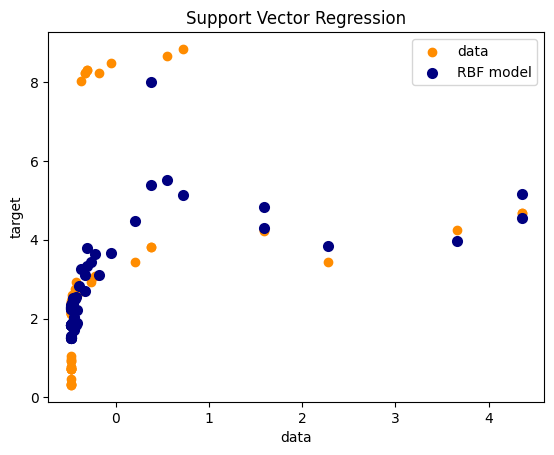

In [78]:
lw = 2
plt.scatter(X_test[:,0], y_test, color='darkorange', label='data')
# plt.hold('on')
plt.scatter(X_test[:,0], y_pred, color='navy', lw=lw, label='RBF model')
# plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
# plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()